**ogs@jupyter-lab: heat diffusion**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-workflows.png" alt="drawing" width="300"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [1]:
from ogs6py import ogs
#run ogs
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="square_1e2_axi.prj", MKL=False)
model.mesh.addMesh(filename="square_1x1_quad_1e2.vtu")
model.geo.addGeom(filename="square_1x1_axi.gml")
model.runModel(path="/home/ok/ogs/build/release/bin/",LOGFILE="example.log")

>>> run ogs <<<
OGS finished with project file square_1e2_axi.prj.
Execution took 0.03738594055175781 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
./square_1e2_axi.pvd
./square_1e2_axi_ts_2_t_2.000000.vtu


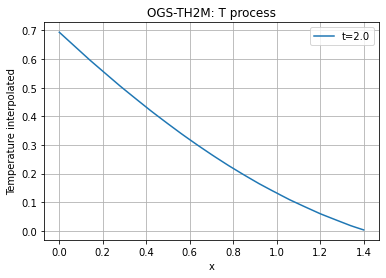

In [2]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO(".", "square_1e2_axi.pvd", dim=2)
# define xaxis
#xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=1.0, num=10)]
#r_x = np.array(xaxis)[:,0]
diagonal = [(i,i,0) for i in np.linspace(start=0.0, stop=1.4, num=100)]
r_diag = np.sqrt(np.array(diagonal)[:,0]**2+np.array(diagonal)[:,1]**2)
# define timestep
time = [2.0]
# read and interpolate from vtu-files listed in pvd
#for t in time:
#    xaxis_t = pvdfile.readPointSetData(t, 'temperature_interpolated', pointsetarray=xaxis)
#    plt.plot(r_x, xaxis_t, label='t='+str(t))
for t in time:
    xaxis_t = pvdfile.readPointSetData(t, 'temperature', pointsetarray=diagonal)
    plt.plot(r_diag, xaxis_t, label='t='+str(t))
# plot formatting
titlestring="OGS-TH2M: T process"
plt.title(titlestring)
#plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Temperature interpolated')
plt.legend()
plt.grid()
plt.savefig("result_TH2M_T_dirichlet.png")
plt.show()

**Results have been shown using [matplotlib](https://matplotlib.org/)**

square_1e2_axi_ts_2_t_2.000000.vtu


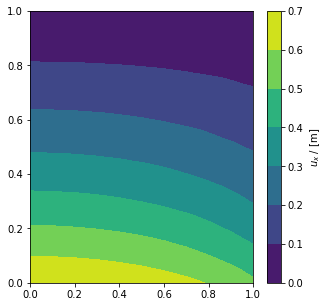

In [3]:
m_plot=vtuIO.VTUIO("square_1e2_axi_ts_2_t_2.000000.vtu", dim=2)
triang=tri.Triangulation(m_plot.points[:,0],m_plot.points[:,1])
u_plot = m_plot.getField("temperature")#.T[0]
#fig, ax = plt.subplots(ncols=2, figsize=(10,10))
#contour_left = ax[0].tricontourf(triang, u_plot)
fig, ax = plt.subplots(figsize=(5,5))
contour_left = ax.tricontourf(triang, u_plot)
fig.colorbar(contour_left,label='$u_x$ / [m]')